In [1]:
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import scanpy as sc
import pandas as pd

In [3]:
from pca import n2s_low_rank

Paul dataset with PC regression and PCA.

In [4]:
paul = sc.read('/Users/josh/src/noise2self-single-cell/data/paul/paul.h5ad')

Optimal rank: 12


AnnData object with n_obs × n_vars = 2417 × 10783 
    obs: 'n_counts'
    var: 'n_cells'

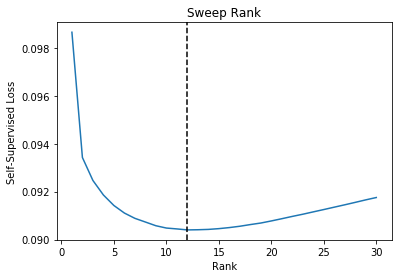

In [5]:
n2s_low_rank(paul, regression=False)

In [6]:
marker_genes = ['Ccl5', 'Prg2', 'Prss34', 'Meis1', 'Cebpe', 'Csf1r', 'Lgals1', 'Elane', 'Prtn3', 'Mpo',
                'Flt3', 'Ifitm1', 'Lmo4', 'Gata1', 'Gfi1b', 'Car1', 'Car2', 'Klf1', 'Zfpm1', 'Cpox']

In [7]:
from sklearn.utils.extmath import randomized_svd
U, S, V = randomized_svd(np.sqrt(paul.X), 3)
denoised_smooth = paul.copy()
denoised_smooth.X = U.dot(np.diag(S).dot(V))

In [23]:
U, S, V = randomized_svd(np.sqrt(paul.X), 30)
denoised_under_smooth = paul.copy()
denoised_under_smooth.X = U.dot(np.diag(S).dot(V))

In [9]:
U, S, V = randomized_svd(np.sqrt(paul.X), 12)
denoised = paul.copy()
denoised.X = U.dot(np.diag(S).dot(V))

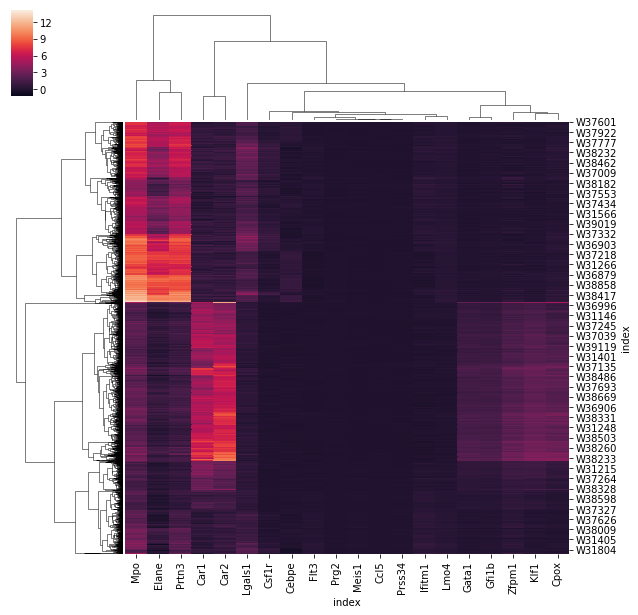

In [11]:
clustergrid = sc.pl.clustermap(denoised[:,marker_genes], use_raw = False, 
                               row_cluster=True, show = False)

In [24]:
raw = paul.copy()
raw.X = np.sqrt(raw.X)

In [25]:
raw_inset = raw[:,marker_genes][clustergrid.dendrogram_row.reordered_ind,:][:, clustergrid.dendrogram_col.reordered_ind]
denoised_inset = denoised[:,marker_genes][clustergrid.dendrogram_row.reordered_ind,:][:, clustergrid.dendrogram_col.reordered_ind]
denoised_smooth_inset = denoised_smooth[:,marker_genes][clustergrid.dendrogram_row.reordered_ind,:][:, clustergrid.dendrogram_col.reordered_ind]
denoised_under_smooth_inset = denoised_under_smooth[:,marker_genes][clustergrid.dendrogram_row.reordered_ind,:][:, clustergrid.dendrogram_col.reordered_ind]

In [26]:
raw_means = np.mean(raw_inset.X, axis = 0, keepdims=True)
raw_max = np.max(raw_inset.X, axis = 0, keepdims=True)
raw_l2 = np.sqrt(np.mean(np.square(raw_inset.X), axis = 0, keepdims=True))
raw_percentile = np.percentile(raw_inset.X, 99.99, axis = 0, keepdims=True)

In [27]:
denoised_max = np.max(denoised_inset.X, axis = 0, keepdims=True)

In [28]:
def scale_col(adata):
    adata.X = adata.X/denoised_max
    adata.X = np.maximum(0, adata.X)
    adata.X = np.minimum(1, adata.X)

In [29]:
scale_col(raw_inset)
scale_col(denoised_inset)
scale_col(denoised_smooth_inset)
scale_col(denoised_under_smooth_inset)

In [30]:
kwargs = {'use_raw': False, 
          'row_cluster': False,
          'col_cluster': False,
          'show': False,
          'yticklabels': False}

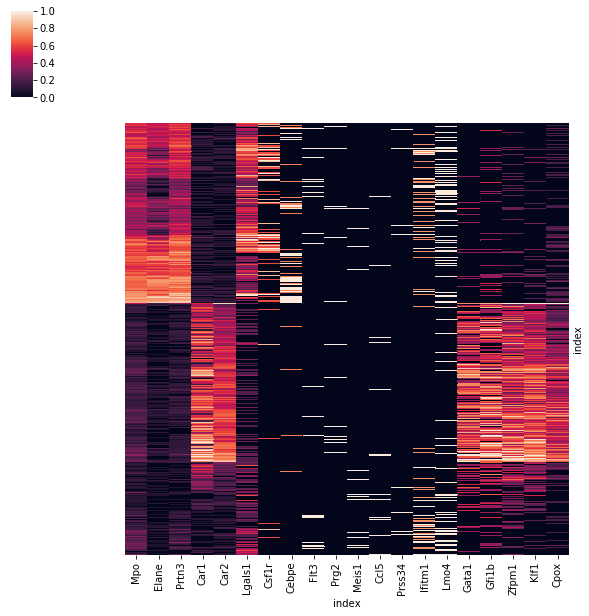

In [31]:
sc.pl.clustermap(raw_inset, **kwargs)
plt.savefig('figures/raw.png')

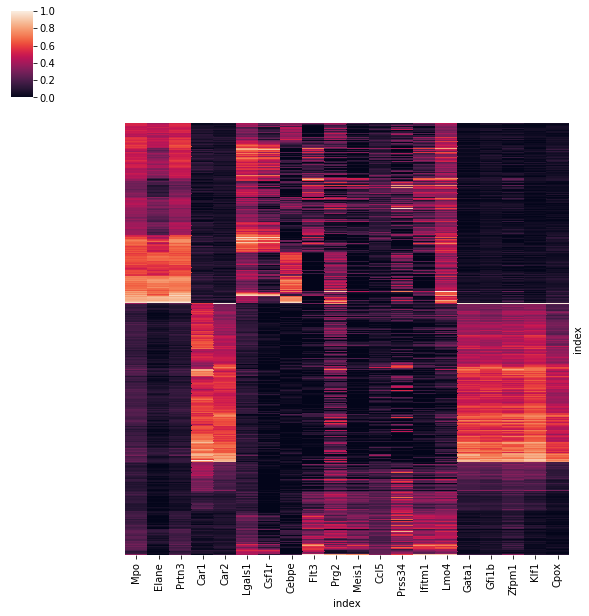

In [32]:
sc.pl.clustermap(denoised_inset, **kwargs)
plt.savefig('figures/optimal.png')

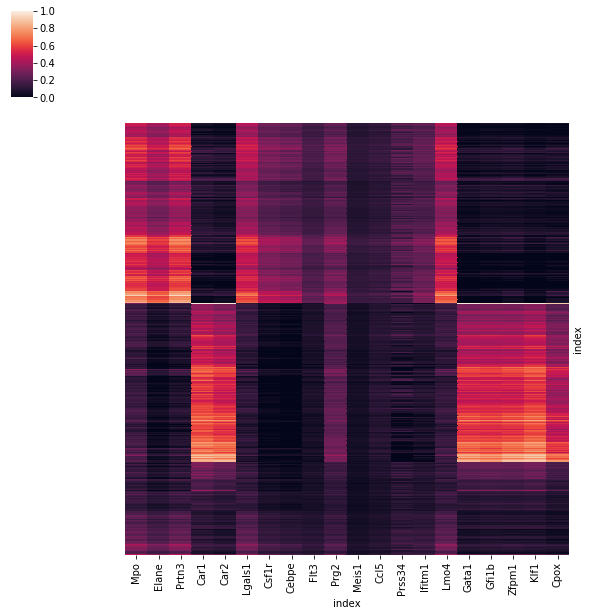

In [33]:
sc.pl.clustermap(denoised_smooth_inset, **kwargs)
plt.savefig('figures/smooth.png')

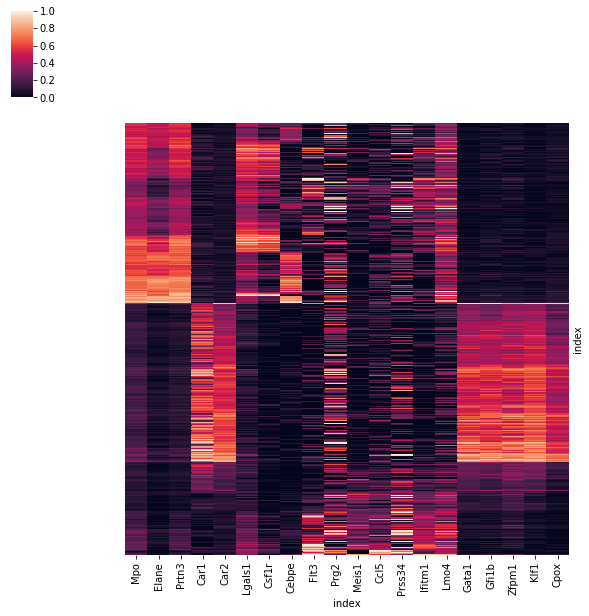

In [34]:
sc.pl.clustermap(denoised_under_smooth_inset, **kwargs)
plt.savefig('figures/under.png')